In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('Ecommerce Customers.csv')

In [4]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [5]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


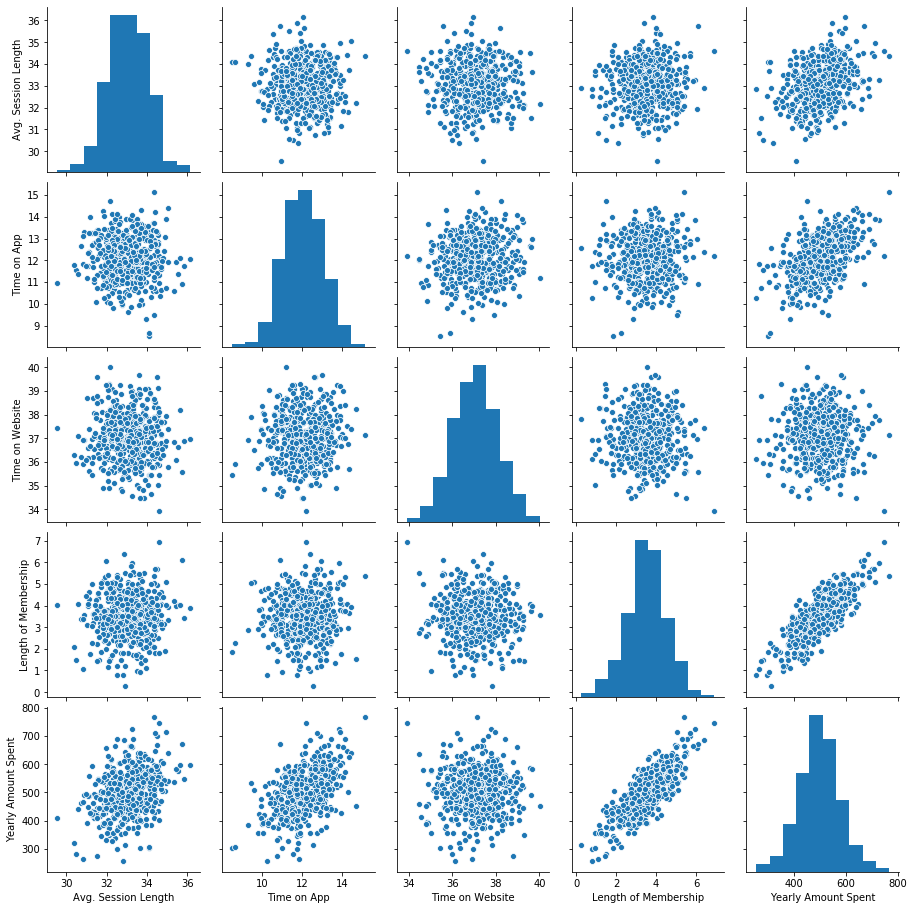

In [8]:
sns.pairplot(df)

As we can see here there is a linear relationship between the yearly amount spent and length of membership in fourth and fifth figures.


## Exploratory Data Analysis
Next, I explore the data, looking for any correlations and other patterns, relative to the features

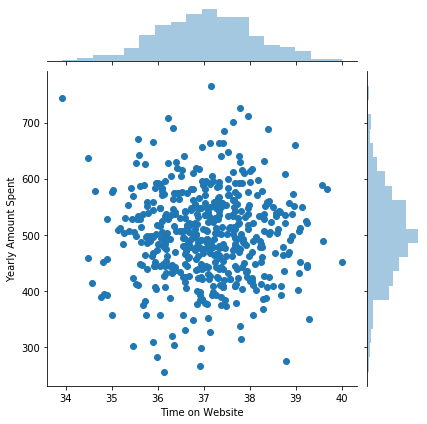

In [9]:
sns.jointplot( 'Time on Website','Yearly Amount Spent',data = df )

 now let see in deep the linear relationship of Yearly Amount Spend vs Length of Membership

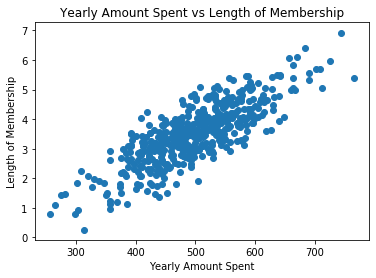

In [11]:
plt.scatter(df['Yearly Amount Spent'],y=df['Length of Membership'])
plt.xlabel('Yearly Amount Spent')
plt.ylabel('Length of Membership')
plt.title("Yearly Amount Spent vs Length of Membership")
plt.show()

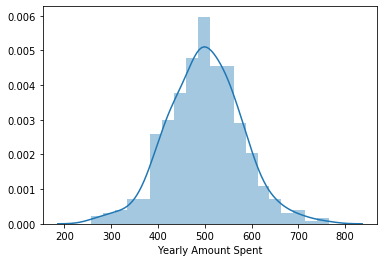

In [12]:
# now let have a look at the distribution over each of the above colums
sns.distplot(df['Yearly Amount Spent'])

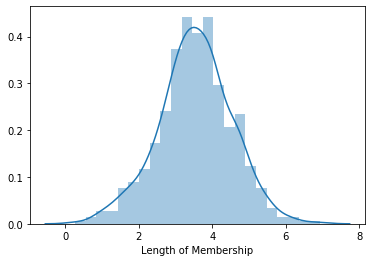

In [13]:
sns.distplot(df['Length of Membership'])

As we can see over the tow distributions it looks quit sumilar so it show there is a linear relationship
now let use the lmplot method from seaborn to show the regression line 

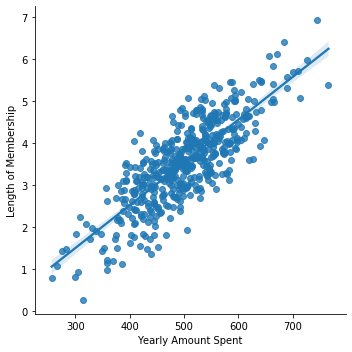

In [17]:
sns.lmplot('Yearly Amount Spent',y='Length of Membership',data = df)
plt.show()

## Training and Testing the data
###### after exploring the data we are going to make the prediction using the sklearn library which is very powerfull
we are going to predict the Yearly Amount Spent  in this case

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np

In [20]:
# before everything we must remember we only use numeric data in our model 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [19]:
# let see all the columns of the dataset as a list
df.columns.to_list

<bound method IndexOpsMixin.tolist of Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')>

In [23]:
X = df.drop(['Email','Address', 'Avatar','Yearly Amount Spent'],axis =1)

In [24]:
y = df['Yearly Amount Spent']

In [25]:
#now let have a look at what we have
X.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


In [26]:
y.head()

0    587.951054
1    392.204933
2    487.547505
3    581.852344
4    599.406092
Name: Yearly Amount Spent, dtype: float64

In [27]:
# now let split the data into train and test
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size = 0.3, random_state =1)

In [28]:
# training the model 
regressor  = LinearRegression()

In [29]:
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

After training our model we can see the coef and the intercept using regressor.coef_ and regressor.intercept_

In [31]:
print("The intercept is :", regressor.intercept_)

The intercept is : 2.8990143619012088e-12


In [32]:
print("The coefficient is :", regressor.coef_)

The coefficient is : [ 5.24239031e-15 -3.14820724e-14 -7.30020423e-14  2.81957328e-14
  1.00000000e+00]


In [33]:
# making the predictions
y_pred = regressor.predict(X_test)

Text(0, 0.5, 'Predicted Values')

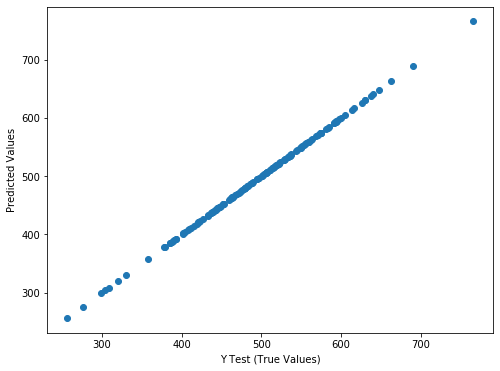

In [34]:
# Plot results

plt.figure(figsize = (8,6))
plt.scatter(y_test, y_pred)
plt.xlabel('Y Test (True Values)')
plt.plot
plt.ylabel('Predicted Values')

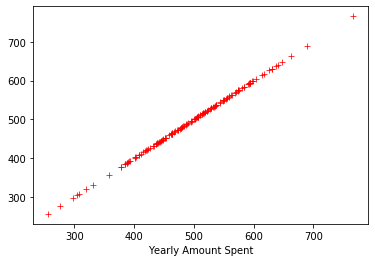

In [40]:
# or we can also use sns.scatterplot
sns.scatterplot(y_test,y_pred,marker='+', color = 'red')


## Evaluating the model 
here we have to find the following:

1- Mean Absolute Error
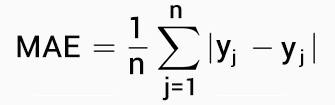
2- Mean Squared Error
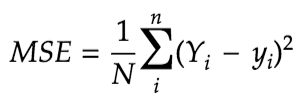
3- Root Mean Squared Error
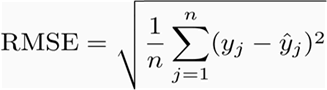

In [42]:
# it examin the model performence 
print("MAE is :", metrics.mean_absolute_error(y_test,y_pred))
print('MSR is :', metrics.mean_squared_error(y_test,y_pred))
print('RMSE is :', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE is : 7.73070496506989e-14
MSR is : 1.0382839980483316e-26
RMSE is : 1.0189622162025104e-13


It will show that our model is very accurate as you can see the RMSE is 1. so the model was perfect

In [52]:
metrics.explained_variance_score(y_test, y_pred)

1.0

### let see the distribution of our prediction 
it will show that it is normally distrubited

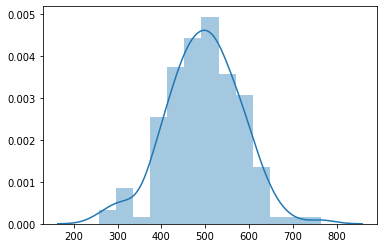

In [45]:
sns.distplot(y_pred)

(array([ 4.,  4., 14., 25., 39., 32., 21.,  9.,  1.,  1.]),
 array([256.67058229, 307.55537025, 358.44015822, 409.32494618,
        460.20973415, 511.09452211, 561.97931008, 612.86409804,
        663.74888601, 714.63367397, 765.51846194]),
 <a list of 10 Patch objects>)

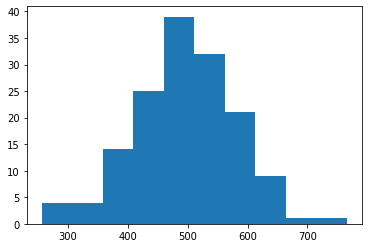

In [46]:
# we can also use histogram to show it
plt.hist(y_pred)

## conclusion
we will conclude something from our work

let see first graph between actual and predicted values

In [50]:
df_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_pred

,Actual,Predicted
304,494.687156,494.687156
340,501.122492,501.122492
47,563.672873,563.672873
67,469.310861,469.310861
479,402.167122,402.167122
...,...,...
331,533.040060,533.040060
197,662.961088,662.961088
95,543.340166,543.340166
122,514.239521,514.239521


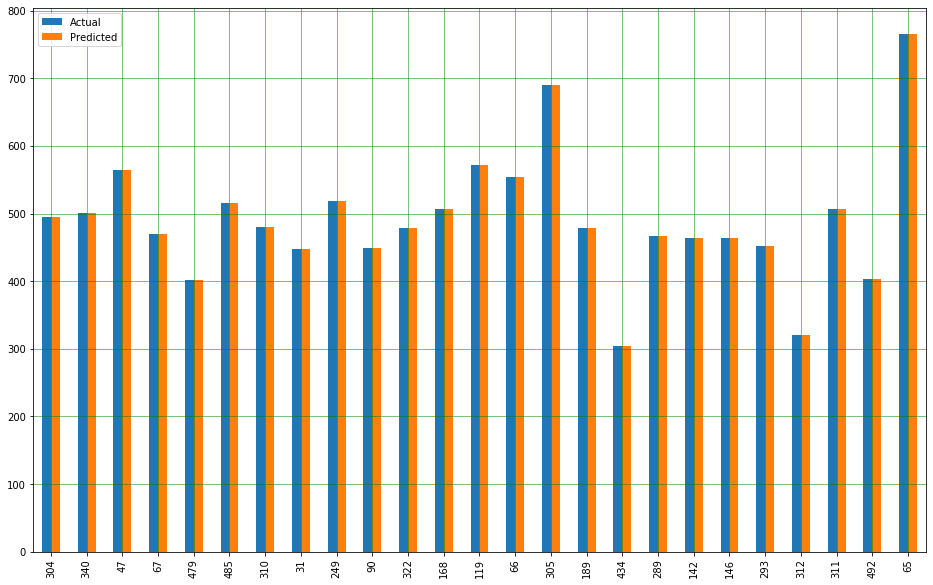

In [51]:
df1 = df_pred.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [53]:
cdf = pd.DataFrame(regressor.coef_, X.columns, columns=["Coeff"])
cdf

,Coeff
Avg. Session Length,5.242390e-15
Time on App,-3.148207e-14
Time on Website,-7.300204e-14
Length of Membership,2.819573e-14
Yearly Amount Spent,1.000000e+00


Made by Abdoulaye Balde python and data science lover
mail: abdoulayegnbalde@gmail.com